# Premier test

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pykrige.uk import UniversalKriging
import skgstat as skg
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
from skgstat import Variogram, OrdinaryKriging
import pandas as pd


In [2]:
data = np.array(
    [
        [0.3, 1.2, 0.47],
        [1.9, 0.6, 0.56],
        [1.1, 3.2, 0.74],
        [3.3, 4.4, 1.47],
        [4.7, 3.8, 1.74],
    ]
)

In [3]:
gridx = np.arange(0.0, 5.5, 0.5)
gridy = np.arange(0.0, 5.5, 0.5)

In [4]:
UK = UniversalKriging(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    variogram_model="linear",
    drift_terms=["regional_linear"],
)

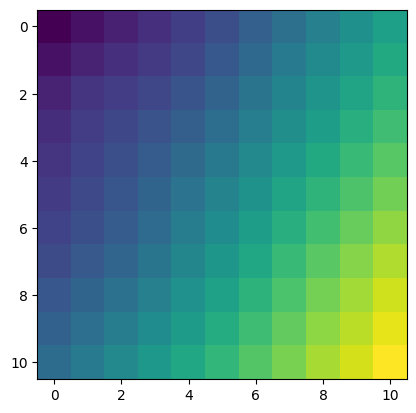

In [6]:
z, ss = UK.execute("grid", gridx, gridy)
plt.imshow(z)
plt.show()

#  Ordinary Kriging examples

In [6]:
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

In [3]:
x = np.array([-100, 280, -290, 23, 101, 110])
y = np.array([56, 100, 590, 470, 200, 25])
col = np.array([29.3, 21.0, 19.2, 29.1, 21.9, 23.1])

Text(0.5, 1.0, 'Measured Porosity')

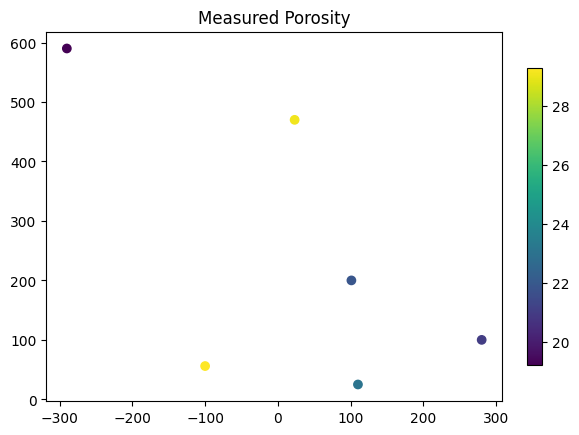

In [4]:
cax = plt.scatter(x, y, c=col)
cbar = plt.colorbar(cax, fraction=0.03)
plt.title('Measured Porosity')

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'exponential' Variogram Model
Partial Sill: 18.426941434770924
Full Sill: 18.426941444377142
Range: 333.50119665110844
Nugget: 9.606219152259665e-09 



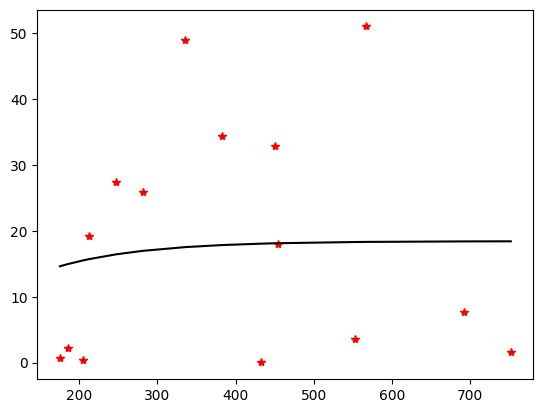

Calculating statistics on variogram model fit...


array([1.84269414e+01, 3.33501197e+02, 9.60621915e-09])

In [8]:
OK = OrdinaryKriging(
    x, 
    y, 
    col, 
    variogram_model='exponential',
    verbose=True,
    enable_plotting=True,
    nlags=100,
)
OK.variogram_model_parameters

In [30]:
gridx = np.arange(-300, 300, 10, dtype='float64')  ### juste un vecteur de krigeage
gridy = np.arange(0, 600, 10, dtype='float64')
zstar, ss = OK.execute("grid", gridx, gridy) ### Calcule une grille krigeée et la variance associée.

Executing Ordinary Kriging...



In [31]:
print(zstar.shape)
print(ss.shape)

(60, 60)
(60, 60)


Graphe des estimations

Text(0.5, 1.0, 'Porosity estimate')

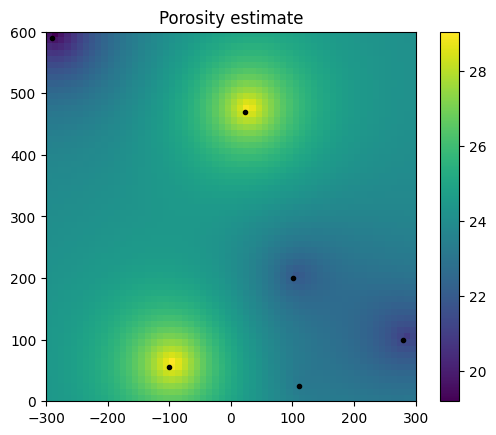

In [32]:
cax = plt.imshow(zstar, extent=(-300, 300, 0, 600), origin='lower')
plt.scatter(x, y, c='k', marker='.') ### localisation des datas
cbar=plt.colorbar(cax)
plt.title('Porosity estimate')

Graphe de l'écart-type

C:\Users\vince\AppData\Local\Temp\ipykernel_7044\100962480.py:1: RuntimeWarning: invalid value encountered in sqrt
  cax = plt.imshow(np.sqrt(ss), extent=(-300, 300, 0, 600), origin='lower') ## on retrouve le variogramme précèdent


Text(0.5, 1.0, 'Porosity standard devation')

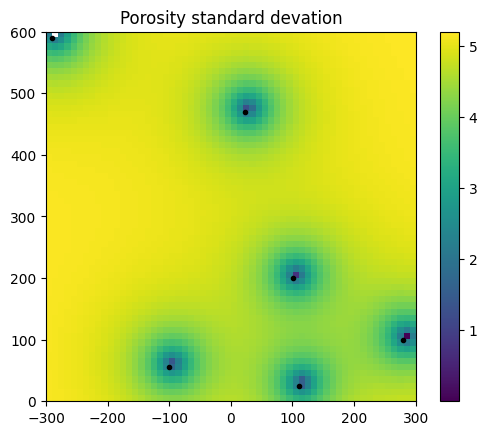

In [35]:
cax = plt.imshow(np.sqrt(ss), extent=(-300, 300, 0, 600), origin='lower') ## on retrouve le variogramme précèdent
plt.scatter(x, y, c='k', marker='.') 
cbar=plt.colorbar(cax)
plt.title('Porosity standard devation')

Text(0.5, 1.0, 'Porosity standard devation')

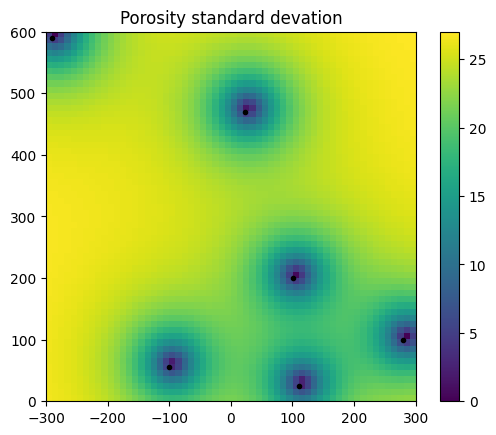

In [36]:
cax = plt.imshow(ss, extent=(-300, 300, 0, 600), origin='lower') ## on retrouve le variogramme précèdent
plt.scatter(x, y, c='k', marker='.') 
cbar=plt.colorbar(cax)
plt.title('Porosity standard devation')

Changement de modèle de variogramme : exponential => gaussian  ( smoother )

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'gaussian' Variogram Model
Partial Sill: 25.56712376086589
Full Sill: 25.56712471844123
Range: 308.5699315051174
Nugget: 9.575753426810059e-07 



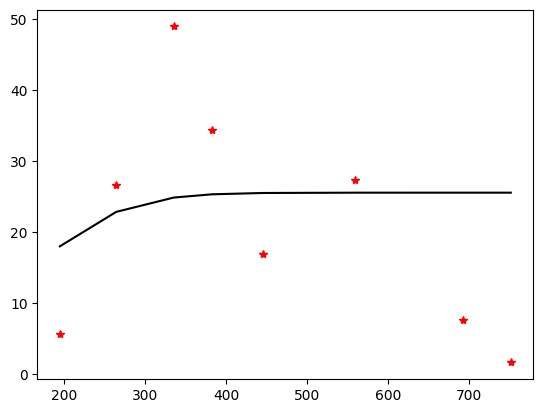

Calculating statistics on variogram model fit...


array([2.55671238e+01, 3.08569932e+02, 9.57575343e-07])

In [38]:
OK = OrdinaryKriging(
    x, 
    y, 
    col, 
    variogram_model='gaussian',
    verbose=True,
    enable_plotting=True,
    nlags=10,
)
OK.variogram_model_parameters

In [39]:
gridx = np.arange(-300, 300, 10, dtype='float64')  ### juste un vecteur de krigeage
gridy = np.arange(0, 600, 10, dtype='float64')
zstar, ss = OK.execute("grid", gridx, gridy) ## Calcule une grille krigeée et la variance associée.

Executing Ordinary Kriging...



Text(0.5, 1.0, 'Porosity estimate')

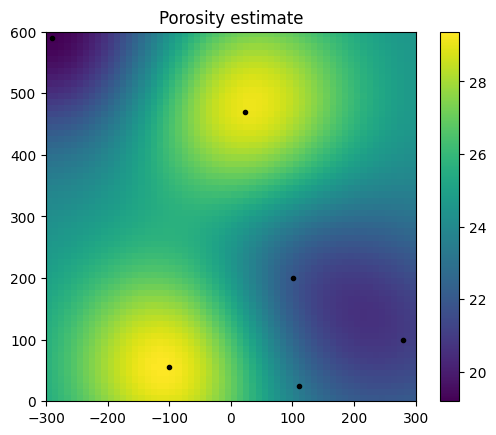

In [40]:
cax = plt.imshow(zstar, extent=(-300, 300, 0, 600), origin='lower')
plt.scatter(x, y, c='k', marker='.') ### localisation des datas
cbar=plt.colorbar(cax)
plt.title('Porosity estimate')

C:\Users\vince\AppData\Local\Temp\ipykernel_7044\100962480.py:1: RuntimeWarning: invalid value encountered in sqrt
  cax = plt.imshow(np.sqrt(ss), extent=(-300, 300, 0, 600), origin='lower') ## on retrouve le variogramme précèdent


Text(0.5, 1.0, 'Porosity standard devation')

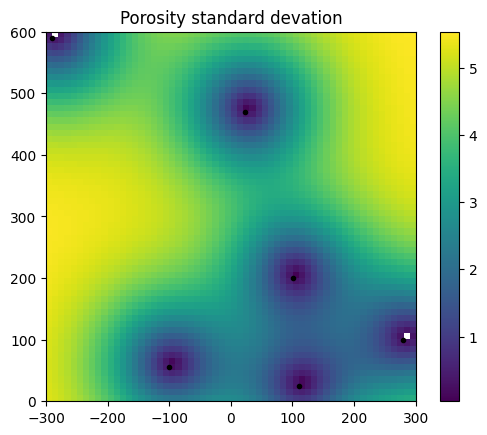

In [41]:
cax = plt.imshow(np.sqrt(ss), extent=(-300, 300, 0, 600), origin='lower') ## on retrouve le variogramme précèdent
plt.scatter(x, y, c='k', marker='.') 
cbar=plt.colorbar(cax)
plt.title('Porosity standard devation')

Changement de modèle de variogramme : exponential => linear  ( pas de corrélation spatiale dans les datas )

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'linear' Variogram Model
Slope: 7.485125298951994e-21
Nugget: 21.181363632588564 



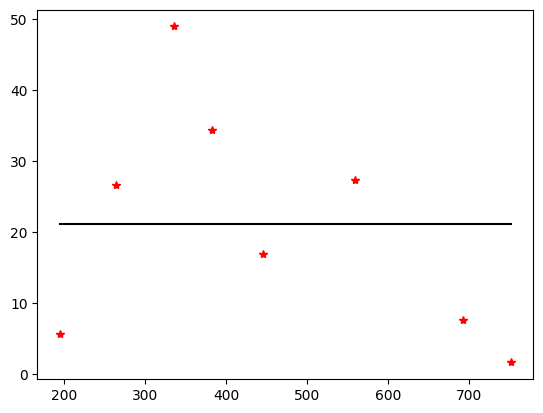

Calculating statistics on variogram model fit...


array([7.48512530e-21, 2.11813636e+01])

In [43]:
OK = OrdinaryKriging(
    x, 
    y, 
    col, 
    variogram_model='linear',
    verbose=True,
    enable_plotting=True,
    nlags=10,
)
OK.variogram_model_parameters

In [44]:
gridx = np.arange(-300, 300, 10, dtype='float64')  ### juste un vecteur de krigeage
gridy = np.arange(0, 600, 10, dtype='float64')
zstar, ss = OK.execute("grid", gridx, gridy) ## Calcule une grille krigeée et la variance associée.

Executing Ordinary Kriging...



In [50]:
col.mean() ### estime avec la valeur moyenne 

23.933333333333334

Text(0.5, 1.0, 'Porosity estimate')

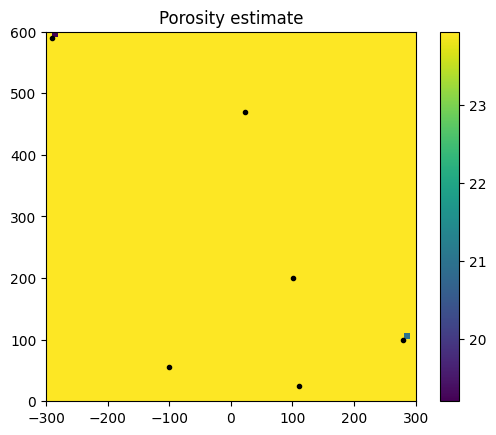

In [45]:
cax = plt.imshow(zstar, extent=(-300, 300, 0, 600), origin='lower')
plt.scatter(x, y, c='k', marker='.') ### localisation des datas
cbar=plt.colorbar(cax)
plt.title('Porosity estimate')

C:\Users\vince\AppData\Local\Temp\ipykernel_7044\100962480.py:1: RuntimeWarning: invalid value encountered in sqrt
  cax = plt.imshow(np.sqrt(ss), extent=(-300, 300, 0, 600), origin='lower') ## on retrouve le variogramme précèdent


Text(0.5, 1.0, 'Porosity standard devation')

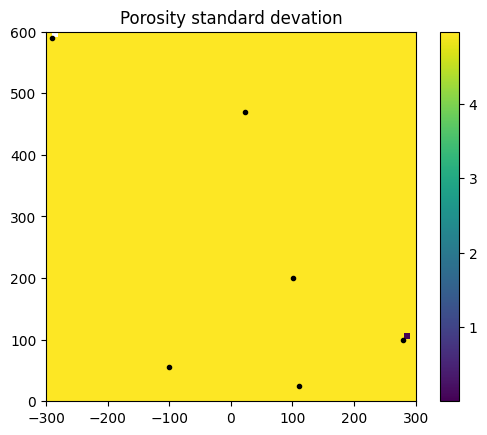

In [46]:
cax = plt.imshow(np.sqrt(ss), extent=(-300, 300, 0, 600), origin='lower') ## on retrouve le variogramme précèdent
plt.scatter(x, y, c='k', marker='.') 
cbar=plt.colorbar(cax)
plt.title('Porosity standard devation')

## TUTO avec MEUSE data_set

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import warnings
import skgstat as skg
warnings.filterwarnings("ignore")

In [108]:
src = skg.data.meuse()
print(src.get('origin'))

Sample dataset of real measurements of heavy metal pollutions
    in the topsoil on a 15x15 meter plot along the river Meuse.
    The data is distributed along with the R-package sp.
    IMPORTANT: If you use this data, cite Pebesma and Bivand (2005)
    and Bivand et al (2013):

      Pebesma EJ, Bivand RS (2005). “Classes and methods for spatial
      data in R.” R News, 5(2), 9–13. https://CRAN.R-project.org/doc/Rnews/.

      Bivand RS, Pebesma E, Gomez-Rubio V (2013). Applied spatial data
      analysis with R, Second edition. Springer, NY. https://asdar-book.org/.

    


shape de coords : (155, 2)
shape de val : (155, 1)
moyenne de z : 153.36129032258066
Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'gaussian' Variogram Model
Partial Sill: 12643.847838178131
Full Sill: 12643.847842433093
Range: 479.43721567362394
Nugget: 4.254961509793555e-06 



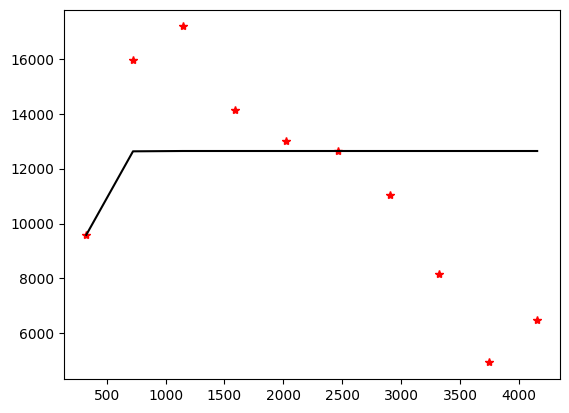

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

In [162]:
coords,val=src.get('sample')
print(f'shape de coords : {coords.shape}')
print(f'shape de val : {val.shape}')
x=coords[:,0]
y=coords[:,1]
z=val
print(f'moyenne de z : {z.mean()}')
#################### PLOT DATA
'''
cax = plt.scatter(x, y, c=z)
cbar = plt.colorbar(cax, fraction=0.03)
plt.title('Measured Porosity')
'''
##################### RECUPERATION DATA PARTIELLE
x_new=[]
y_new=[]
z_new=[]
for i in range(1,150,2):
    x_new.append(x[i])
    y_new.append(y[i])
    z_new.append(z[i])
#################### PLOT NEW_DATA
'''
cax = plt.scatter(x_new, y_new, c=z_new)
cbar = plt.colorbar(cax, fraction=0.03)
plt.title('Measured Porosity')
'''
##################Variogramme

OK = OrdinaryKriging(
    x_new, 
    y_new, 
    z_new, 
    variogram_model='gaussian',
    verbose=True,
    enable_plotting=True,
    nlags=10,
)
gridx = np.arange(-178500, 181500, 10)  
gridy = np.arange(329000, 333500, 10)
zstar, ss = OK.execute("grid", gridx, gridy)

cax = plt.imshow(zstar, extent=(-178500, 181500, 329000, 333500), origin='lower')
plt.scatter(x_new, y_new, c='k', marker='.')
cbar=plt.colorbar(cax)
plt.title('Porosity estimate')

In [163]:
coords, vals = src.get('sample')
pd.DataFrame({'x': coords[:, 0], 'y': coords[:, 1], 'lead': vals.flatten()})

,x,y,lead
0,181072,333611,299
1,181025,333558,277
2,181165,333537,199
3,181298,333484,116
4,181307,333330,117
...,...,...,...
150,179184,330182,49
151,179085,330292,173
152,178875,330311,119
153,179466,330381,51


Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'exponential' Variogram Model
Partial Sill: 12251.37480412204
Full Sill: 12251.374804122117
Range: 732.0911542681197
Nugget: 7.668668193323624e-11 



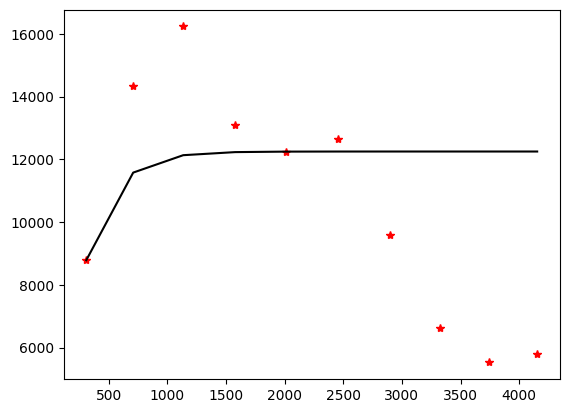

Calculating statistics on variogram model fit...


array([1.22513748e+04, 7.32091154e+02, 7.66866819e-11])

In [164]:
OK = OrdinaryKriging(
    coords[:, 0], 
    coords[:, 1], 
    vals.flatten(), 
    variogram_model='exponential',
    verbose=True,
    enable_plotting=True,
    nlags=10,
)
OK.variogram_model_parameters

In [165]:
gridx = np.arange(-178500, 181500, 10)  ### juste un vecteur de krigeage
gridy = np.arange(329000, 333500, 10)
zstar, ss = OK.execute("grid", gridx, gridy) ## Calcule une grille krigeée et la variance associée.

Executing Ordinary Kriging...



UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

Text(0.5, 1.0, 'Porosity estimate')

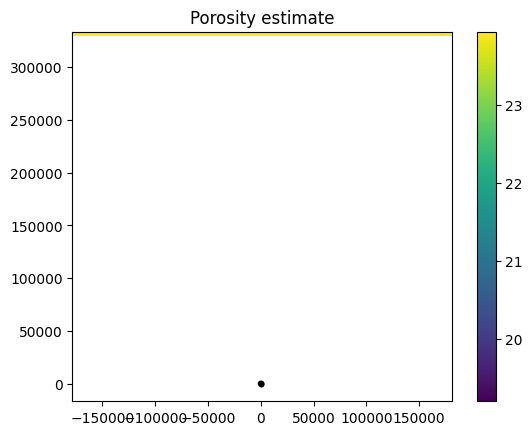

In [62]:
cax = plt.imshow(zstar, extent=(-178500, 181500, 329000, 333500), origin='lower')
plt.scatter(x, y, c='k', marker='.') ### localisation des datas
cbar=plt.colorbar(cax)
plt.title('Porosity estimate')

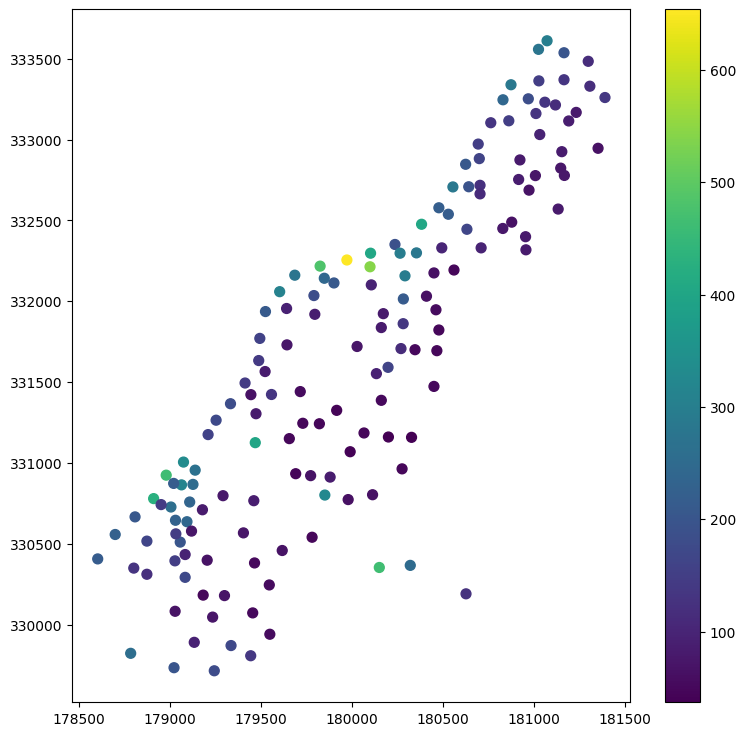

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
art = ax.scatter(coords[:, 0], coords[:, 1], s=50, c=vals.flatten())
plt.colorbar(art)

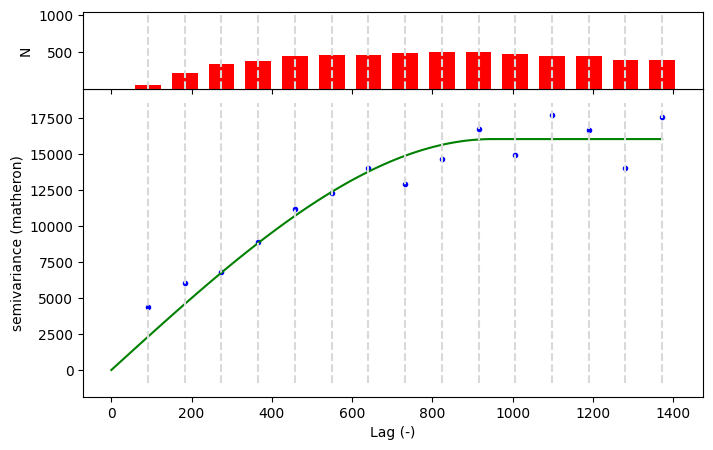

In [64]:
V = skg.Variogram(coords, vals.flatten(), maxlag='median', n_lags=15, normalize=False)
fig = V.plot(show=False)

In [15]:
print('Sample variance: %.2f   Variogram sill: %.2f' % (vals.flatten().var(), V.describe()['sill']))

Sample variance: 12312.20   Variogram sill: 16066.26


In [16]:
ok = skg.OrdinaryKriging(V, min_points=5, max_points=15, mode='exact')
x = coords[:, 0]
y = coords[:, 1]
xx, yy = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
s2 = ok.sigma.reshape(xx.shape)

(0.0, 100.0)

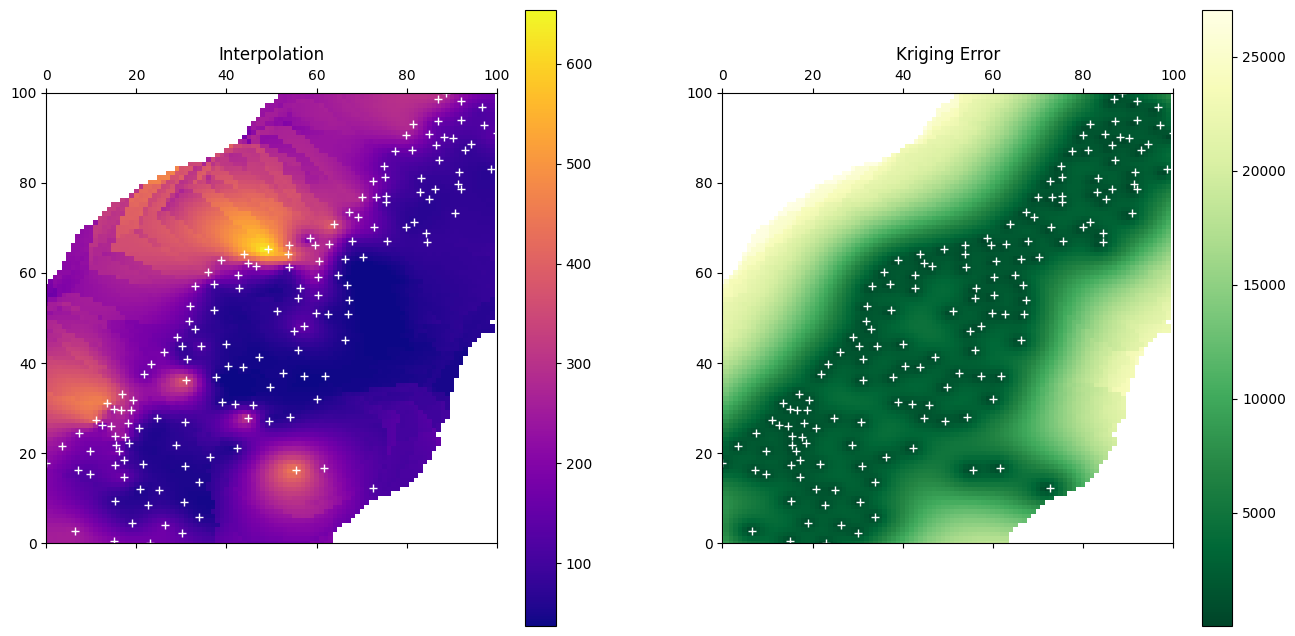

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# rescale the coordinates to fit the interpolation raster
x_ = (x - x.min()) / (x.max() - x.min()) * 100
y_ = (y - y.min()) / (y.max() - y.min()) * 100

art = axes[0].matshow(field.T, origin='lower', cmap='plasma', vmin=vals.min(), vmax=vals.max())
axes[0].set_title('Interpolation')
axes[0].plot(x_, y_, '+w')
axes[0].set_xlim((0, 100))
axes[0].set_ylim((0, 100))
plt.colorbar(art, ax=axes[0])
art = axes[1].matshow(s2.T, origin='lower', cmap='YlGn_r')
axes[1].set_title('Kriging Error')
plt.colorbar(art, ax=axes[1])
axes[1].plot(x_, y_, '+w')
axes[1].set_xlim((0, 100))
axes[1].set_ylim((0, 100))

## TUTO avec données crées

In [86]:
data = pd.DataFrame(np.random.randint(10, 100,size=(100, 3)), columns=list('xyz'))

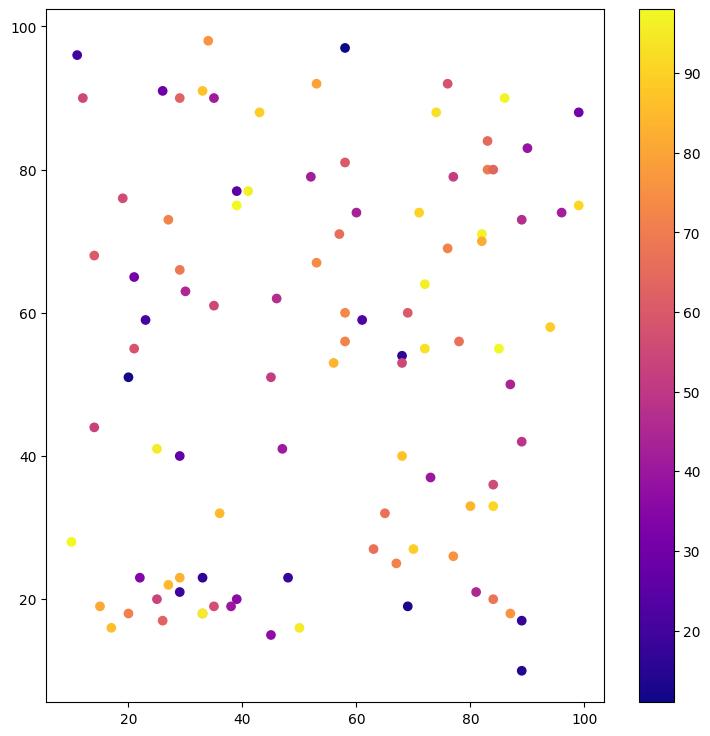

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
art = ax.scatter(data.x,data.y, c=data.z, cmap='plasma')
plt.colorbar(art)

spherical Variogram
-------------------
Estimator:         matheron
Effective Range:   14.12
Sill:              714.04
Nugget:            0.00
        


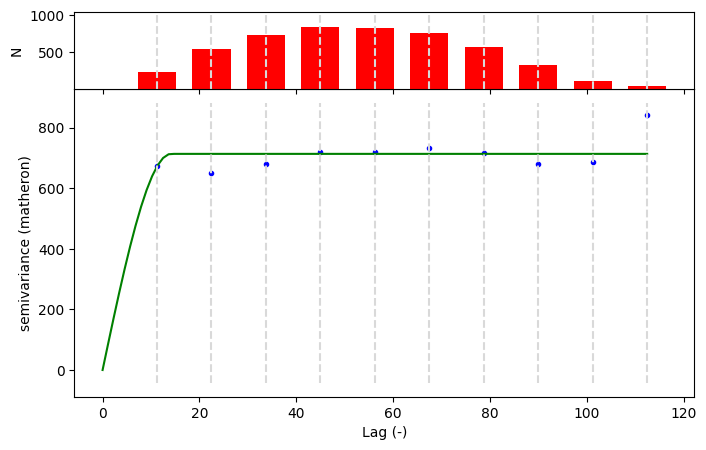

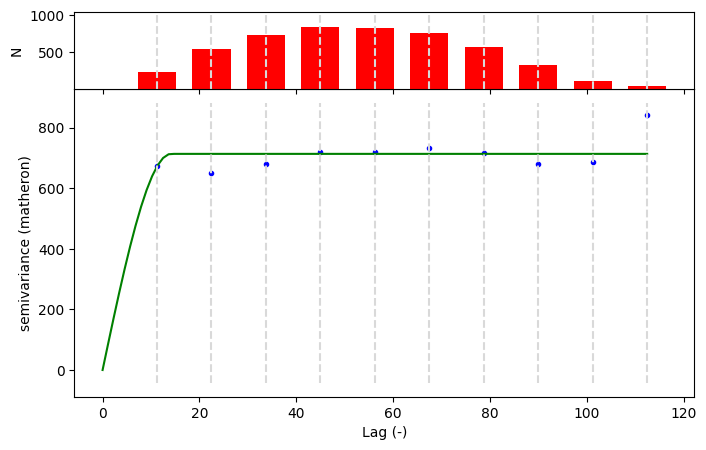

In [22]:
V = skg.Variogram(coordinates=data[['x', 'y']].values, values=data['z'].values)
print(V)
V.plot()

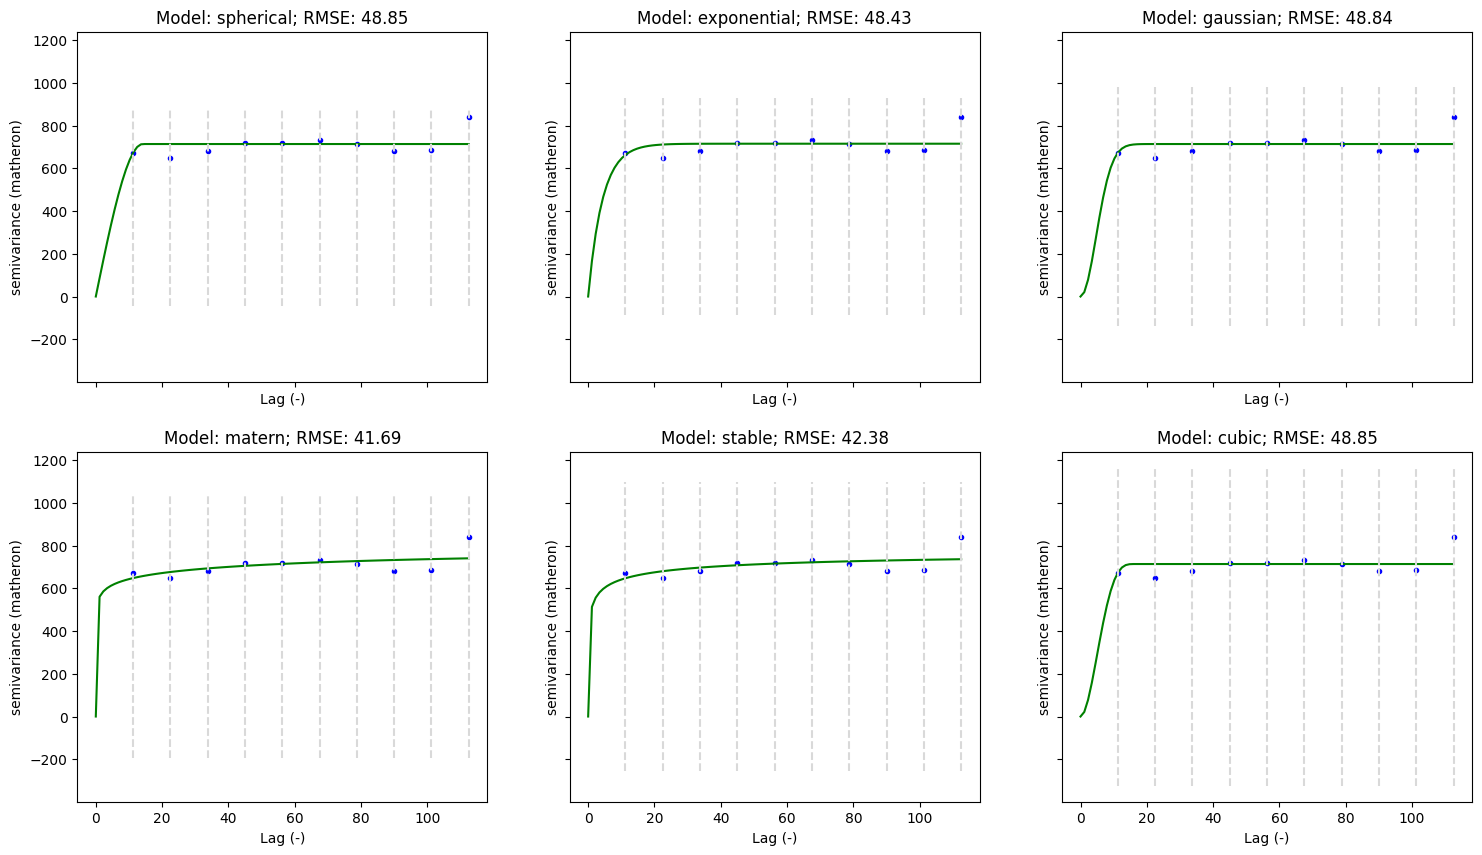

In [24]:
fig, _a = plt.subplots(2,3, figsize=(18, 10), sharex=True, sharey=True)
axes = _a.flatten()
for i, model in enumerate(('spherical', 'exponential', 'gaussian', 'matern', 'stable', 'cubic')):
    V.model = model
    V.plot(axes=axes[i], hist=False, show=False)
    axes[i].set_title('Model: %s; RMSE: %.2f' % (model, V.rmse))

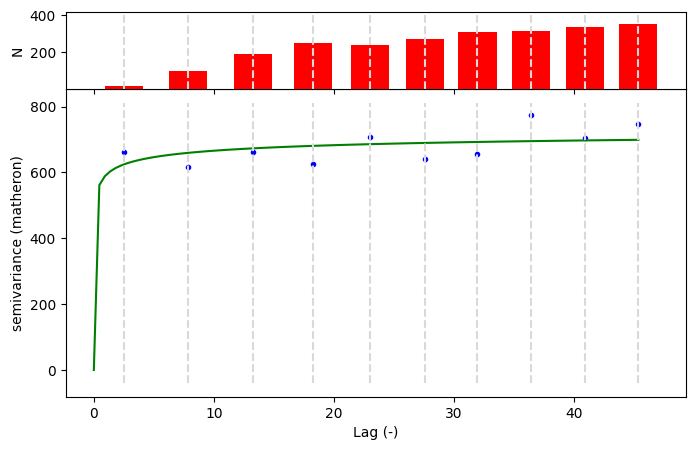

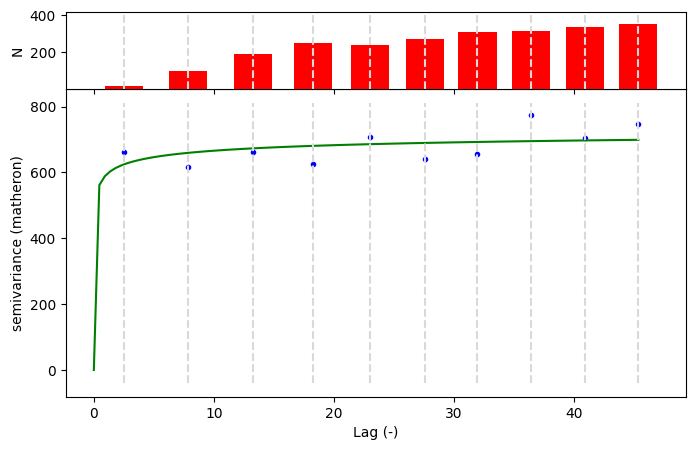

In [27]:
V.n_lags = 10
V.maxlag = 50
V.bin_func = 'kmeans'
V.plot()

In [31]:
V.model = 'stable'
ok = OrdinaryKriging(V, min_points=3, max_points=5, mode='estimate')

## build the target grid
xx, yy = np.mgrid[0:99:100j, 0:99:100j]
field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
s2 = ok.sigma.reshape(xx.shape)

## plot le result
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
art = axes[0].matshow(field.T, origin='lower', cmap='plasma')
axes[0].set_title('Interpolation')
axes[0].plot(data.x, data.y, '+k')
axes[0].set_xlim((0,100))
axes[0].set_ylim((0,100))
plt.colorbar(art, ax=axes[0])
art = axes[1].matshow(s2.T, origin='lower', cmap='YlGn_r')
axes[1].set_title('Kriging Error')
plt.colorbar(art, ax=axes[1])
axes[1].plot(data.x, data.y, '+w')
axes[1].set_xlim((0,100))
axes[1].set_ylim((0,100))

TypeError: OrdinaryKriging.__init__() missing 2 required positional arguments: 'y' and 'z'